# 1. Required Packages:

In [1]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error
import scipy
import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
%matplotlib inline

/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# 2. Pre-Processing:

In [2]:
raw_data = pd.read_csv("pp-complete.csv", dtype={"70000": np.int32} )

In [3]:
raw_data.columns.values

array(['{F61BC602-B309-4373-B142-14C6F7CAD04C}', '70000',
       '1995-06-09 00:00', 'EX39 1BE', 'D', 'N', 'F', '14', 'Unnamed: 8',
       'LUNDY VIEW', 'NORTHAM', 'BIDEFORD', 'TORRIDGE', 'DEVON', 'A', 'A.1'], dtype=object)

In [4]:
raw_data.columns = ["Transaction unique identifier","Price","DateOfTransfer","Postcode","PropertyType","Old/New","Duration","PAON","SAON","Street","Locality","Town","District","County","PPD","Record "]

In [5]:
raw_data.columns.values

array(['Transaction unique identifier', 'Price', 'DateOfTransfer',
       'Postcode', 'PropertyType', 'Old/New', 'Duration', 'PAON', 'SAON',
       'Street', 'Locality', 'Town', 'District', 'County', 'PPD', 'Record '], dtype=object)

In [6]:
# raw_data.head(5)
# raw_data.shape
# raw_train, raw_test = train_test_split(raw_data, test_size=0.5)
columns = (list(raw_data.columns.values))
for column in (columns):
    if column is "Duration" or column is "PropertyType" or column is "DateOfTransfer" or column is "Town" or column is "Price":
        continue
    else:
        raw_data = raw_data.drop(column, 1)
raw_data.head()

,Price,DateOfTransfer,PropertyType,Duration,Town
0,59950,1995-02-06 00:00,F,L,LONDON
1,73000,1995-11-23 00:00,S,F,CHELMSFORD
2,55000,1995-03-31 00:00,S,F,BURGESS HILL
3,73000,1995-02-24 00:00,T,F,NEWCASTLE UPON TYNE
4,147500,1995-02-07 00:00,T,F,SHAFTESBURY


In [7]:
# raw_data["Price"].dtype
# raw_data["PropertyType"].describe()
# raw_data["Duration"].describe()
# raw_data["Town"].describe()
# raw_data["Price"].describe()

In [8]:
# ax = sns.stripplot(x = (raw_data['Postcode']) ,y = (raw_data['Price']), jitter = True, alpha =0.5)
# plt.show()
raw_data["DateOfTransfer"] = pd.to_datetime(raw_data["DateOfTransfer"],infer_datetime_format=True)

### 2.1 Train and Test data split:

In [9]:
# raw_data.head()
split_date = pd.datetime(2015,1,1)
train = raw_data.loc[raw_data['DateOfTransfer'] < split_date]
test = raw_data.loc[raw_data['DateOfTransfer'] >= split_date]
# raw_data.sort_values(by="DateOfTransfer")


In [10]:
# train[train['Town']=='LONDON'].Town
train['Town'] = np.where(train['Town']== 'LONDON', 1, 0)

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [11]:
# train['Town'].describe()

### 2.2 Boolean encoding

In [12]:
test['Town'] = np.where(test['Town']== 'LONDON', 1, 0)

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [13]:
# test['Town'].describe()

### 2.3 One-Hot encoding for train data:

In [14]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(train['PropertyType'])
train['PropertyType'] = le.transform(train['PropertyType'])


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [15]:
# train.head()

In [16]:
le_duration = preprocessing.LabelEncoder()
le_duration.fit(train['Duration'])
train['Duration'] = le_duration.transform(train['Duration'])

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


### 2.4 One-Hot encoding for test data:

In [18]:
le_test_pt = preprocessing.LabelEncoder()
le_test_pt.fit(test['PropertyType'])
test['PropertyType'] = le_test_pt.transform(test['PropertyType'])

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [20]:
le_test_duration = preprocessing.LabelEncoder()
le_test_duration.fit(test['Duration'])
test['Duration'] = le_test_duration.transform(test['Duration'])

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


### 2.5 Removing Date of Transfer column:

In [22]:
train = train.drop("DateOfTransfer", 1)

In [23]:
test = test.drop("DateOfTransfer", 1)

### 2.6 Separating dependent and independent variables

In [26]:
trainY = train["Price"]
trainX = train.drop("Price", 1)
# test= test[test["Price"] < 500000000]  ## Uncomment if outliers has to be removed
testY = test["Price"]
testX = test.drop("Price", 1)

# 3. Models and Evaluation:
Few other models are also implemented, feel free to check those out.

### 3.1 Linear Regression(Baseline):

In [31]:
linear = LinearRegression()
linear.fit(trainX, trainY)
predY_linear = linear.predict(testX)
cod_linear = r2_score(testY, predY_linear, multioutput='variance_weighted')
rms_linear = mean_squared_error(testY, predY_linear) ** 0.5
mae_linear = mean_absolute_error(testY, predY_linear)
cc_linear = np.corrcoef(testY, predY_linear)[1][0]
print(cod_linear)
print(rms_linear)
print(mae_linear)
print(cc_linear)

-0.00427021052886
1163195.44077
173649.598543
0.141192564914


### 3.2 XGBooster Regressor:

In [29]:
import xgboost
from xgboost.sklearn import XGBRegressor
xg = XGBRegressor()
xg.fit(trainX, trainY)  
predY_xg = xg.predict(testX) 
cod_xg = r2_score(testY, predY_xg, multioutput='variance_weighted')
rms_xg = mean_squared_error(testY, predY_xg) ** 0.5
mae_xg = mean_absolute_error(testY, predY_xg)
cc_xg = np.corrcoef(testY, predY_xg)[1][0]
print(cod_xg)
print(rms_xg)
print(mae_xg)
print(cc_xg)

/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


0.0345522006582
1140490.83465
206567.801635
0.223089030475


### 3.3 DecisionTree Regressor:
Kindly ignore it, if this is not required.

In [30]:
# from sklearn.tree import DecisionTreeRegressor
# decision = DecisionTreeRegressor(max_depth=2)
# decision.fit(trainX, trainY)
# predY_decision = decision.predict(testX)
# cod_decision = r2_score(testY, predY_decision, multioutput='variance_weighted')
# rms_decision = mean_squared_error(testY, predY_decision) ** 0.5
# mae_decision = mean_absolute_error(testY, predY_decision)
# cc_decision = np.corrcoef(testY, predY_decision)[1][0]
# print(cod_decision)
# print(rms_decision)
# print(mae_decision)
# print(cc_decision)

-0.00596427547447
1164176.1023
174087.1687
0.127347864575


### 3.4 Ridge Regression:
Kindly ignore it, if this is not required.

In [28]:
# clf = Ridge(alpha=1.0)
# clf.fit(trainX, trainY)
# predY = clf.predict(testX)
# cod = r2_score(testY, predY, multioutput='variance_weighted')
# rms = mean_squared_error(testY, predY) ** 0.5
# mae = mean_absolute_error(testY, predY)
# cc = np.corrcoef(testY, predY)[1][0]
# print(cod)
# print(rms)
# print(mae)
# print(cc)

-0.00427021650387
1163195.44423
173649.598363
0.141192549688


### 3.5 Random Forest:

In [32]:
# from sklearn.ensemble import RandomForestClassifier
# rf = RandomForestClassifier(n_estimators = 5)
# rf.fit(trainX, trainY)
# predY_rf = rf.predict(testX)
# cod_rf = r2_score(testY, predY_rf, multioutput='variance_weighted')
# rms_rf = mean_squared_error(testY, predY_rf) ** 0.5
# mae_rf = mean_absolute_error(testY, predY_rf)
# cc_rf = np.corrcoef(testY, predY_rf)[1][0]
# print(cod_rf)
# print(rms_rf)
# print(mae_rf)
# print(cc_rf)

### Scater plot for predicted and measured Price values:

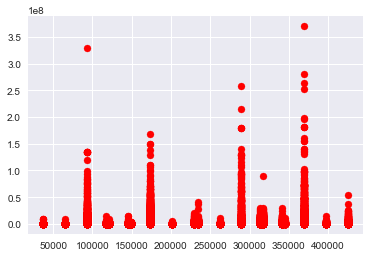

In [33]:
plt.scatter(predY_linear, testY, c = "red")
plt.show()

# 4. Exploratory Data Analysis:

## 4.1 Correlation between Propoerty type and Price

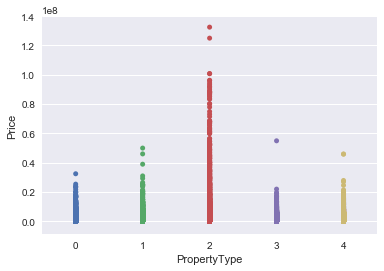

In [34]:
sns.stripplot(x="PropertyType", y="Price", data=train);

## 4.2 Correlation between Duration type and Price

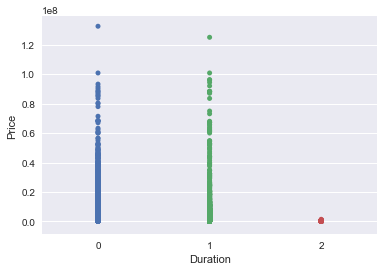

In [35]:
sns.stripplot(x="Duration", y="Price", data=train);

## 4.3 Correlation between Town(isLondon) and Price

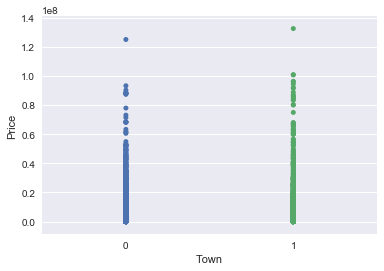

In [36]:
sns.stripplot(x="Town", y="Price", data=train);

In [37]:
# formula = 'Price ~ C(PropertyType) + C(Duration) + C(Town) + C(PropertyType):C(Duration):C(Town)'
# model = ols(formula, train).fit()
# aov_table = statsmodels.stats.anova.anova_lm(model, typ=3)
# print(aov_table)